# This notebook contains the necessary code to reproduce table 1, plot 3, 4 in the paper

Run the notebook after training all relevant models (look at the training script to aid with that)

In [1]:
import pandas as pd
import numpy as np
import torch
import os
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.animation as animation
import mpl_toolkits.axes_grid1
import matplotlib.widgets

%load_ext autoreload
%autoreload 2

from em_discrete.tasks.binary_linearVB import BinaryLinearVBTask
from em_discrete.utils.result_handling import parse_directory
from emt_tools.utils import *
from emt_tools.models.linearModel import LinearModel

/home/akaruvally_umass_edu/pi_hava_umass_edu/arjun/home/anaconda3/envs/func_mod_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
EXPERIMENT_NAME = "all_linear_rnn"

EXPERIMENT_OUTPUT_DIR = "./"

EXPERIMENT_PATH = os.path.join(EXPERIMENT_OUTPUT_DIR, EXPERIMENT_NAME)
BATCH_SIZE = 64

## Load the result_dict from the learned models (if saved before, run the next section)

In [12]:
result_df = parse_directory(os.path.join(EXPERIMENT_PATH, "binary_linearVB"))

In [13]:
result_df[:5]

,batch_size,curriculum,curriculum_threshold,hidden_dim,input_dim,l2_penalty,learning_rate,seed,seq_length,task_id,path
0,64,True,0.98,128,8,0.000,0.001,1,8,"(255, 0, 0)",/home/akaruvally_umass_edu/pi_hava_umass_edu/a...
1,64,True,0.90,64,8,0.001,0.001,1,8,"(255, 0, 0)",/home/akaruvally_umass_edu/pi_hava_umass_edu/a...
2,64,True,0.98,32,8,0.000,0.001,9,8,"(9241421688590303745, 0, 0)",/home/akaruvally_umass_edu/pi_hava_umass_edu/a...
3,64,True,0.90,32,8,0.001,0.001,9,8,"(9241421688590303745, 0, 0)",/home/akaruvally_umass_edu/pi_hava_umass_edu/a...
4,64,True,0.98,32,8,0.001,0.001,9,8,"(9241421688590303745, 0, 0)",/home/akaruvally_umass_edu/pi_hava_umass_edu/a...


## Main Script

The below script walks through the files in the experiment directory and runs the EMT interpretation pipeline on each model that has >0.9 accuracy 

1. Ensure convergence in the theoretical and empirical spectrum
2. Compute variable memories
3. Visualize the learned $W_{hh}$ in the variable memories
4. Visualize the evolving hidden state in the variable memories

NOTE: Note that occassionally, even if the theoretical and empirical spectrum converges, the variable memories may not produce the expected output. The reason for this is that the algorithm for computing variable memories relies on a pseudoinverse which is prone to errors when computing in practise. Moreover, any small errors in the pseudoinverse is excacerbated by the fact that we do power iteration to compute all the variable memories. This limitation should not be considered an issue with the theoretical contributions of the paper, but rather the nuances of estimating the dual basis in practice. It is possible that in future, a better algorithm for empirically 
computing variable memories can be formulated.

Evaluating model id: 0/1820
Task id: (255, 0, 0)


/home/akaruvally_umass_edu/pi_hava_umass_edu/arjun/home/anaconda3/envs/func_mod_env/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:196: UserWarning: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
  rank_zero_warn(


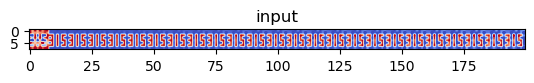

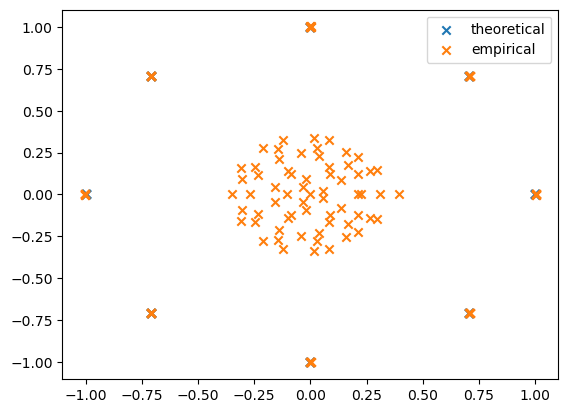

Matrix size: (128, 128)
Rank: 64
Figure 4 in the paper


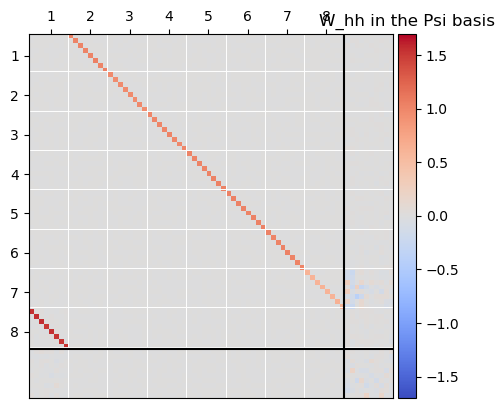

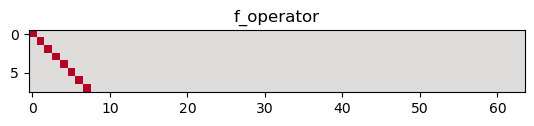

/tmp/ipykernel_335036/1004581900.py:148: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, idx+1)


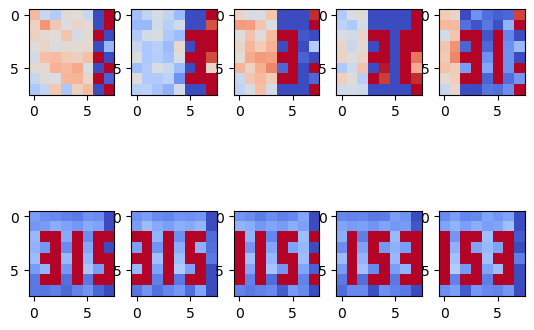

Evaluating model id: 1/1820
Task id: (255, 0, 0)
Evaluating model id: 2/1820
Task id: (9241421688590303745, 0, 0)


/home/akaruvally_umass_edu/pi_hava_umass_edu/arjun/home/anaconda3/envs/func_mod_env/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:196: UserWarning: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
  rank_zero_warn(


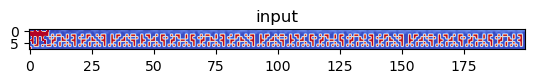

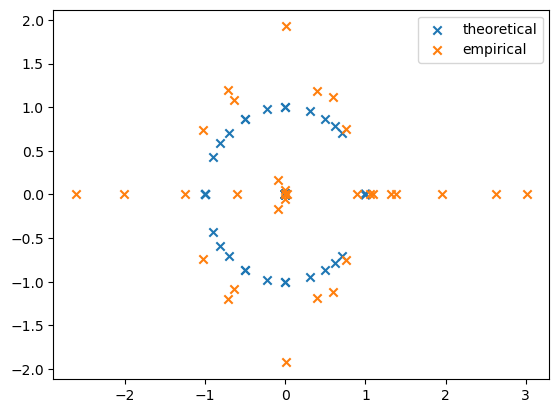

Matrix size: (32, 32)
Rank: 25
Figure 4 in the paper


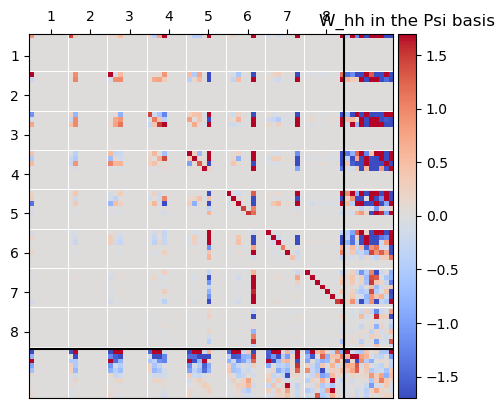

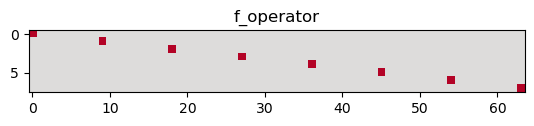

/tmp/ipykernel_335036/1004581900.py:148: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, idx+1)


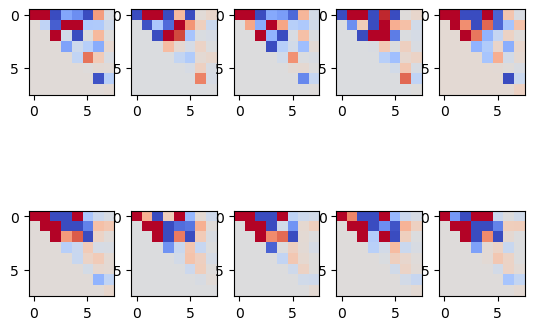

Evaluating model id: 3/1820
Task id: (9241421688590303745, 0, 0)
Evaluating model id: 4/1820
Task id: (9241421688590303745, 0, 0)


/home/akaruvally_umass_edu/pi_hava_umass_edu/arjun/home/anaconda3/envs/func_mod_env/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:196: UserWarning: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
  rank_zero_warn(


Evaluating model id: 5/1820
Task id: (9241421688590303745, 0, 0)
Evaluating model id: 6/1820
Task id: (9241421688590303745, 0, 0)
Evaluating model id: 7/1820
Task id: (9241421688590303745, 0, 0)
Evaluating model id: 8/1820
Task id: (9241421688590303745, 0, 0)
Evaluating model id: 9/1820
Task id: (9241421688590303745, 262676, 189)


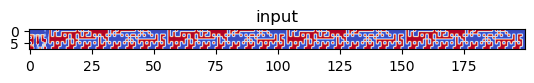

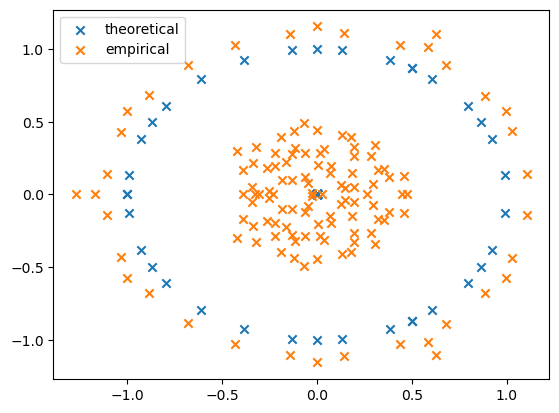

Matrix size: (128, 128)
Rank: 36
Figure 4 in the paper


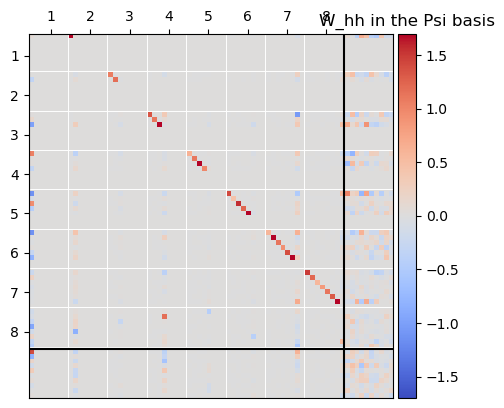

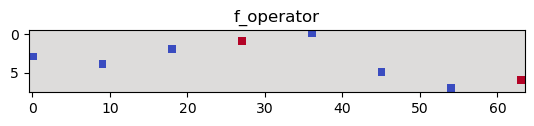

/tmp/ipykernel_335036/1004581900.py:148: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, idx+1)


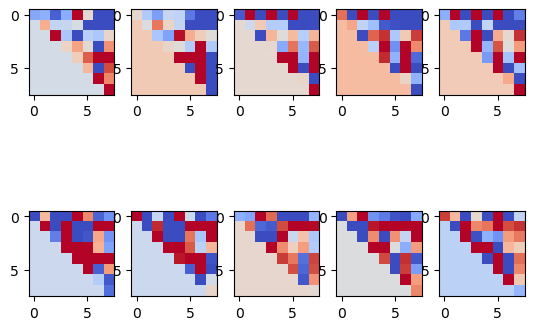

Evaluating model id: 10/1820
Task id: (9241421688590303745, 262676, 189)


/home/akaruvally_umass_edu/pi_hava_umass_edu/arjun/home/anaconda3/envs/func_mod_env/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:196: UserWarning: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
  rank_zero_warn(


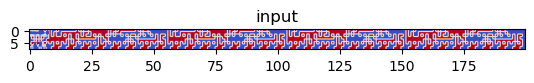

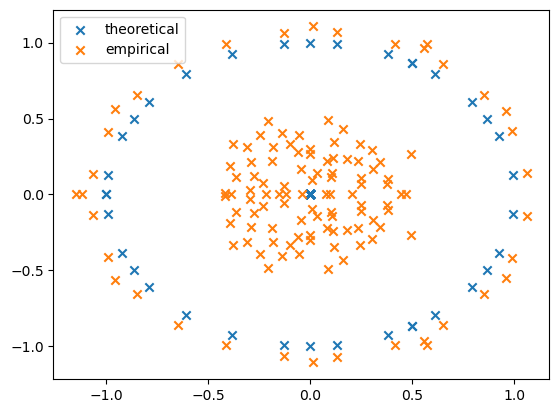

Matrix size: (128, 128)
Rank: 36
Figure 4 in the paper


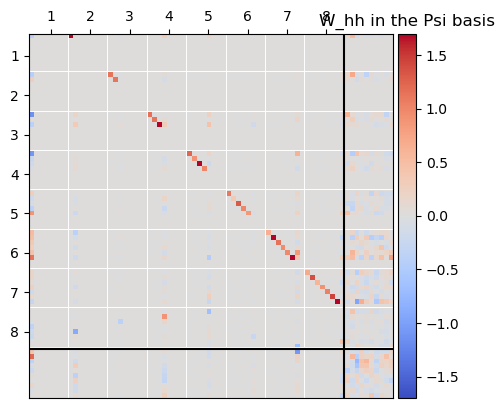

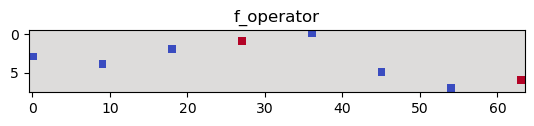

/tmp/ipykernel_335036/1004581900.py:148: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, idx+1)


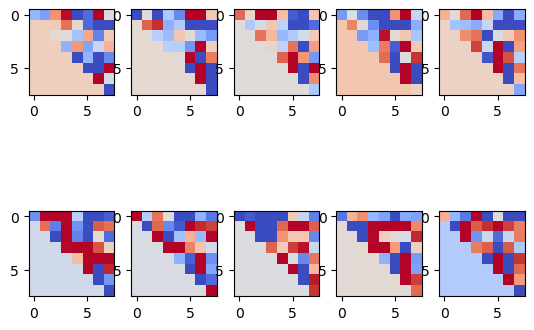

Evaluating model id: 11/1820
Task id: (9241421688590303745, 262676, 189)


/home/akaruvally_umass_edu/pi_hava_umass_edu/arjun/home/anaconda3/envs/func_mod_env/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:196: UserWarning: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
  rank_zero_warn(


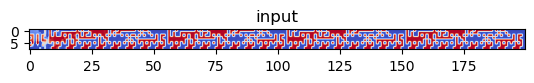

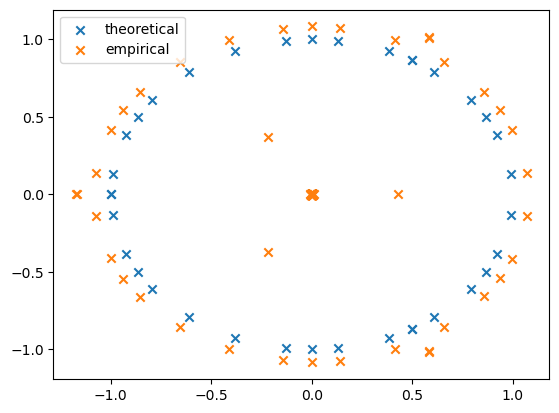

Matrix size: (128, 128)
Rank: 36
Figure 4 in the paper


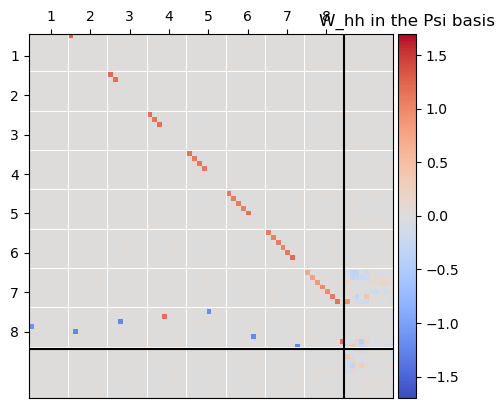

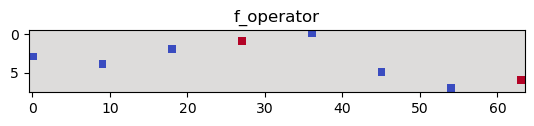

/tmp/ipykernel_335036/1004581900.py:148: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, idx+1)


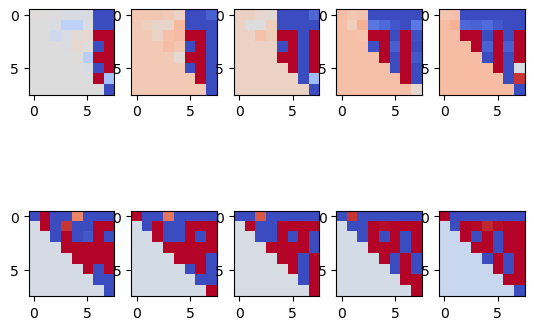

Evaluating model id: 12/1820
Task id: (9241421688590303745, 262676, 189)


/home/akaruvally_umass_edu/pi_hava_umass_edu/arjun/home/anaconda3/envs/func_mod_env/lib/python3.11/site-packages/pytorch_lightning/utilities/parsing.py:196: UserWarning: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.
  rank_zero_warn(


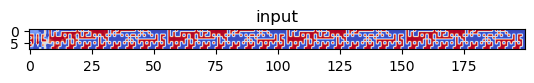

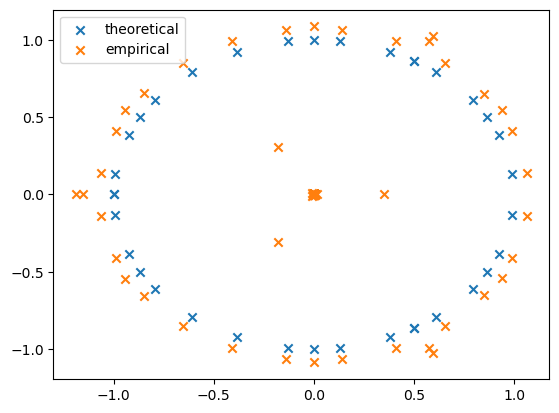

Matrix size: (128, 128)
Rank: 36
Figure 4 in the paper


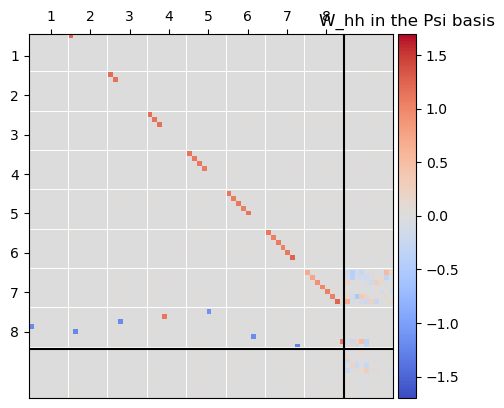

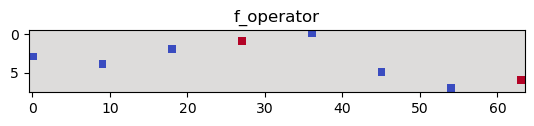

/tmp/ipykernel_335036/1004581900.py:148: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, idx+1)


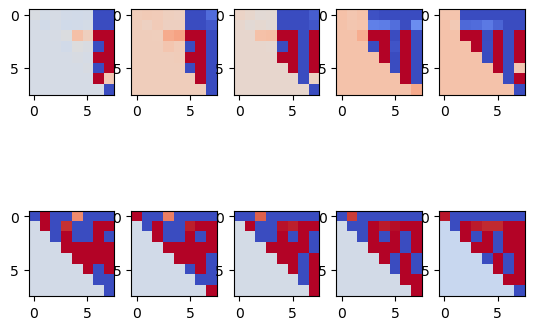

In [24]:
## Run models on test set to evaluate accuracy
test_accuracies = []
spectral_distance = []

tested_models = 0
for model_id, model_path in enumerate(result_df['path']):
    
    print("Evaluating model id: {}/{}".format(model_id, len(result_df["path"])))
    
    if not os.path.isfile(model_path):
        test_accuracies.append(-1)
        spectral_distance.append(-1)
        continue
    
    if torch.cuda.is_available():
        device = "cuda"
    else:
        device = "cpu"
    lmodel = BinaryLinearVBTask.load_from_checkpoint(model_path, map_location=torch.device(device))
    lmodel.eval()
    
    print("Task id: {}".format(result_df.iloc[model_id]["task_id"]))
    
    ## linearized model
    lmodel.test_dataset.set_horizon(200)
    test_dataset = lmodel.test_dataset.__iter__()
    
    accuracies = []
    for i in range(10):
        sample = next(test_dataset)
        x, y = sample
        x = x.to(device)
        y = y.to(device)
        
        lmodel.model.initialize_hidden(batch_size=BATCH_SIZE, device=device)
        y_hat = lmodel.model.forward(x)
        
        # y_hat = torch.stack(y_hat, dim=0).squeeze()
        y_hat = y_hat.reshape((-1, lmodel.model.input_dim))
        y_hat = y_hat.reshape((-1, BATCH_SIZE, lmodel.model.input_dim))
        y_hat = y_hat[lmodel.seq_length:, :, :]
        
        y = y[lmodel.seq_length:, :, :]
        
        # convert predictions
        y_hat_predictions = y_hat.detach().clone()
        y_hat_predictions[y_hat_predictions >= 0] = 1
        y_hat_predictions[y_hat_predictions < 0] = -1
        y_hat_predictions = y_hat_predictions.long()

        y = y.cpu().detach().numpy()
        y_hat_predictions = y_hat_predictions.cpu().detach().numpy()

        accuracy = (y_hat_predictions.astype(np.int_) == y.astype(np.int_)).astype(np.int_)
        accuracies.append(np.mean(accuracy))
        
    
    test_accuracies.append(np.mean(accuracies))
    spectral_distance.append(-1)
    
    if np.mean(accuracies) > 0.9 and lmodel.model.hidden_dim >= 0:
        # run custom input
        x = torch.zeros((200, 1, lmodel.input_dim))
        
        # create 315
        x[:lmodel.seq_length, 0, :] = -1
        x[0, 0, [2,4,6]] = 1
        x[1, 0, 2:7] = 1
        x[3, 0, 2:7] = 1
        x[5, 0, [2,3,4,6]] = 1
        x[6, 0, [2,4,5,6]] = 1
        
        # plt.imshow(x[:lmodel.seq_length, 0, :].squeeze().T, cmap="coolwarm")
        # # plt.show()
        # plt.savefig("input.svg")
        
        lmodel.model.initialize_hidden(batch_size=1, device=device)
        y_hat = lmodel.model.forward(x.to(device))
        
        plt.title("input")
        plt.imshow(y_hat.squeeze().cpu().data.numpy().T, cmap="coolwarm", vmin=-1, vmax=1)
        plt.show()
        
        emt_lmodel = LinearModel(lmodel.input_dim, lmodel.model.hidden_dim)
        emt_lmodel.parse_simple_rnn(lmodel.model)

        phi_theoretical = construct_phi_from_operator(lmodel.train_dataset.f_operator.cpu().data.numpy())
        
        # Step 1 - visualize the eigen-spectrum of \Phi and the learned W_hh
        eig_vals, _ = np.linalg.eig(phi_theoretical)
        plt.scatter(eig_vals.real, eig_vals.imag, marker="x", label="theoretical")
        
        eig_vals, _ = np.linalg.eig(emt_lmodel.W_hh)
        plt.scatter(eig_vals.real, eig_vals.imag, marker="x", label="empirical")
        plt.legend()
        plt.show()
        
        # Step 2 - compute variable memories
        Psi, Psi_star = emt_lmodel.get_variable_basis(lmodel.seq_length, 
                                            lmodel.model.all_hidden.cpu().data.numpy().squeeze(),
                                            alpha=1, 
                                            f_operator=lmodel.train_dataset.f_operator.cpu().data.numpy().T,
                                            strength=1,
                                            threshold=0.99)
        
        # Step 3 - visualize the learned W_hh in the variable memories (Figure 4 in the paper)
        print("Figure 4 in the paper")
        plt.figure(figsize=(5,5))
        ax = plt.subplot()
        W_hh_Psi = Psi_star @ emt_lmodel.W_hh @ Psi
        im = ax.imshow(W_hh_Psi.real, cmap="coolwarm", alpha=1, 
                       vmin=-1.7, vmax=1.7)
        
        # create an Axes on the right side of ax. The width of cax will be 5%
        # of ax and the padding between cax and ax will be fixed at 0.05 inch.
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)

        plt.colorbar(im, cax=cax)
        
        for i in range(lmodel.input_dim):
            ax.axhline(y=((i+1)*lmodel.seq_length)-.9, color='w', linestyle='-', lw=0.7)

        for j in range(lmodel.input_dim):
            ax.axvline(x=((j+1)*lmodel.seq_length)-.5, color='w', linestyle='-', lw=0.7)

        ax.axhline(y=lmodel.input_dim*lmodel.seq_length-0.5, color='k', linestyle='-')
        ax.axvline(x=lmodel.input_dim*lmodel.seq_length-0.5, color='k', linestyle='-')

        ax.set_xticks(np.arange(lmodel.input_dim//2, lmodel.input_dim*lmodel.seq_length, lmodel.input_dim), range(1, lmodel.seq_length+1))
        ax.set_yticks(np.arange(lmodel.input_dim//2, lmodel.input_dim*lmodel.seq_length, lmodel.input_dim), range(1, lmodel.seq_length+1))
        ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
        plt.title("W_hh in the Psi basis")
        # plt.savefig("hiddenPhi_{}.svg".format(tested_models))
        plt.show()
        
        ## visualize the f_operator as a verification that the f_operator that is learned is the actual f_operator of the data
        plt.title("f_operator")
        plt.imshow(lmodel.train_dataset.f_operator.T, cmap="coolwarm", vmin=-1, vmax=1)
        plt.show()
        
        ## Step 4 - visualize the hidden state in the variable memories. (Figure 3 in the paper)
        timesteps = [1, 2, 3, 4, 5, 14, 15, 16, 17, 18]  # set of 10 time indices to visualize
        h_history = lmodel.model.all_hidden.cpu().data.numpy().squeeze() # collect h_history from the model
        
        plt.title("Variable Memories")
        for idx, timestep in enumerate(timesteps):
            plt.subplot(2, 5, idx+1)
            h_Psi = (Psi_star @ h_history[timestep].reshape((-1, 1)))[:lmodel.input_dim*lmodel.seq_length].reshape((lmodel.input_dim, lmodel.seq_length))
            h_Psi = h_Psi.real
            
            # fixing the range of activity (in RNNs, the activation may be small in order for it to lie in the linearized region)
            h_Psi = h_Psi - np.mean(h_Psi)
            h_Psi = h_Psi / np.std(h_Psi)
            plt.imshow(h_Psi.T, cmap="coolwarm", vmin=-1, vmax=1)
        plt.show()
        
        tested_models += 1
        if tested_models > 5:
            break

# Combined Evaluation

In [18]:
result_df["test_accuracy"] = test_accuracies
result_df["spectral_error"] = spectral_distance

In [19]:
result_df.to_csv(os.path.join(EXPERIMENT_PATH, "result_df.csv"), index=False)

## Load a previously saved result_dict

In [3]:
result_df = pd.read_csv(os.path.join(EXPERIMENT_PATH, "result_df.csv"))

In [22]:
all_tasks = result_df["task_id"].unique()
all_hidden = result_df["hidden_dim"].unique()
all_l2 = result_df["l2_penalty"].unique()

In [23]:
all_combinations = list(itertools.product(*[all_tasks, all_hidden, all_l2]))

In [49]:
combination_result = {}
combination_result_accuracy = {}

for combination in all_combinations:
    print(combination)
    temp_df = result_df.loc[(result_df["task_id"] == combination[0]) & 
                            (result_df["hidden_dim"] == combination[1]) & 
                            (result_df["l2_penalty"] == combination[2])
                            # (result_df["test_accuracy"] >= 0.99) & 
                            # (result_df["spectral_error"] > -1)
                           ]
    
    # print(temp_df.groupby(['seed'])['test_accuracy'].max())
    # print(temp_df.groupby(['seed']).head())
    # print(len(temp_df))
    if len(temp_df) > 0:
        combination_result[combination] = np.mean(temp_df.groupby(['seed'])['spectral_error'].min())
        combination_result_accuracy[combination] =  np.mean(temp_df.groupby(['seed'])['test_accuracy'].max())
    else:
        combination_result[combination] = -1
    
    # combination_result[]
    # print(np.mean(temp_df.groupby(['seed'])['test_accuracy'].max()))
    #     all_seeds = temp_df["seed"].unique()
    
#     for seed in all_seeds:
#         temp_df = 
#     print(temp_df["test_accuracy"])

('(255, 0, 0)', 128, 0.0)
('(255, 0, 0)', 128, 0.001)
('(255, 0, 0)', 128, 0.1)
('(255, 0, 0)', 128, 10.0)
('(255, 0, 0)', 64, 0.0)
('(255, 0, 0)', 64, 0.001)
('(255, 0, 0)', 64, 0.1)
('(255, 0, 0)', 64, 10.0)
('(255, 0, 0)', 32, 0.0)
('(255, 0, 0)', 32, 0.001)
('(255, 0, 0)', 32, 0.1)
('(255, 0, 0)', 32, 10.0)
('(9241421688590303745, 0, 0)', 128, 0.0)
('(9241421688590303745, 0, 0)', 128, 0.001)
('(9241421688590303745, 0, 0)', 128, 0.1)
('(9241421688590303745, 0, 0)', 128, 10.0)
('(9241421688590303745, 0, 0)', 64, 0.0)
('(9241421688590303745, 0, 0)', 64, 0.001)
('(9241421688590303745, 0, 0)', 64, 0.1)
('(9241421688590303745, 0, 0)', 64, 10.0)
('(9241421688590303745, 0, 0)', 32, 0.0)
('(9241421688590303745, 0, 0)', 32, 0.001)
('(9241421688590303745, 0, 0)', 32, 0.1)
('(9241421688590303745, 0, 0)', 32, 10.0)
('(9241421688590303745, 262676, 189)', 128, 0.0)
('(9241421688590303745, 262676, 189)', 128, 0.001)
('(9241421688590303745, 262676, 189)', 128, 0.1)
('(9241421688590303745, 262676, 1

In [50]:
result_df['hidden_dim'].unique()

array([128,  64,  32])

## Reproduce Table 1

In [36]:
for i, task_id in enumerate(all_tasks):
    print("=========Task {} ============".format(i+1))
    # print("hidden_dim | l2_reg", end="")
    for l2 in [0.0, 0.001, 0.1]:
        print("\t {}".format(l2), end=" ")
    print("\n........................................")
    
    print("")
    for hidden_dim in [32, 64, 128]:
        print("{} \t".format(hidden_dim), end=" |")
        
        for l2 in [0.0, 0.001, 0.1]:
            if combination_result[(task_id, hidden_dim, l2)] != -1:
                print("{:.4f} ({:.2f})".format(combination_result[(task_id, hidden_dim, l2)],
                                               combination_result_accuracy[(task_id, hidden_dim, l2)]), 
                      end=" & ")
            else:
                print("-", end="\t")
        
        print("")

=========Task 1 ============
	 0.0 	 0.001 	 0.1 
........................................

32 	 |-	-	-	
64 	 |-	-	-	
128 	 |0.0005 (1.00) & -	-	
=========Task 2 ============
	 0.0 	 0.001 	 0.1 
........................................

32 	 |-	-	-	
64 	 |0.0075 (1.00) & -	-	
128 	 |0.0055 (1.00) & 0.0031 (1.00) & -	
=========Task 3 ============
	 0.0 	 0.001 	 0.1 
........................................

32 	 |-	-	-	
64 	 |0.0026 (1.00) & 0.0010 (1.00) & -	
128 	 |0.0031 (1.00) & 0.0005 (1.00) & -	
=========Task 4 ============
	 0.0 	 0.001 	 0.1 
........................................

32 	 |-	-	-	
64 	 |0.0112 (1.00) & 0.0011 (1.00) & -	
128 	 |0.0022 (1.00) & 0.0006 (1.00) & -	


## Latex formatting

In [57]:
result_df["seed"].unique().shape

(20,)

In [54]:
for i, task_id in enumerate(all_tasks):
    print("$\mathcal{T}_%d$" % (i+1), end=" ")
    for hidden_dim in [64, 128]:
        for l2 in [0.0, 0.001, 0.1]:
            if combination_result[(task_id, hidden_dim, l2)] != -1 and not np.isnan(combination_result[(task_id, hidden_dim, l2)]):
                print("& {:.4f} ".format(combination_result[(task_id, hidden_dim, l2)]), 
                      end="")
            else:
                print("& ---", end="")
            
            try:
                if combination_result_accuracy[(task_id, hidden_dim, l2)] != -1:
                    print(" ({:.2f})".format(float(combination_result_accuracy[(task_id, hidden_dim, l2)])), end="")
            except KeyError:
                pass
                
        
    print("\\\\")

$\mathcal{T}_1$ & --- (0.97)& --- (0.88)& --- (0.50)& 0.0005  (1.00)& --- (0.93)& --- (0.50)\\
$\mathcal{T}_2$ & 0.0075  (1.00)& --- (0.85)& --- (0.50)& 0.0055  (0.98)& 0.0031  (0.98)& --- (0.50)\\
$\mathcal{T}_3$ & 0.0026  (1.00)& 0.0010  (0.97)& --- (0.50)& 0.0031  (0.98)& 0.0005  (1.00)& --- (0.50)\\
$\mathcal{T}_4$ & 0.0112  (0.94)& 0.0011  (1.00)& --- (0.50)& 0.0022  (1.00)& 0.0006  (1.00)& --- (0.50)\\


In [58]:
all_tasks[1]

'(9241421688590303745, 0, 0)'